In [2]:
import sys, os, pathlib
sys.path.append("/root/shared/gitrepos/smart-comp-sci/utils")
sys.path.append("/root/shared/gitrepos/smart-comp-sci/mito-example")
import smart_analysis
from mito_ode import mito_ode_calc
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
params = {'axes.labelsize': 12,
            'axes.titlesize': 6,
            'legend.fontsize': 10,
            'xtick.labelsize':10,
            'ytick.labelsize': 10,
            'figure.figsize': (5,4),
            'pdf.fonttype': 42,
            'ps.fonttype': 42,
            'axes.spines.top': False,
            'axes.spines.right': False,
            'legend.loc': "best"}
matplotlib.rcParams.update(params)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
cur_dir = "/root/shared/gitrepos/smart-comp-sci/mito-example"
if True:#"npy-files-fixed" not in os.listdir(cur_dir):
    files_dir = "/root/scratch/smart-comp-sci-data/mito/results_fixedmodel_coarse"
    npy_dir = pathlib.Path("/root/shared/gitrepos/smart-comp-sci/mito-example/npy-files")
    npy_dir.mkdir(exist_ok=True)
    test_folders = os.listdir(files_dir)
    condition_str = []
    for i in [3]:#range(len(test_folders)):
        results_folder = f"{files_dir}/{test_folders[i]}"
        # mesh_file = "/root/scratch/smart-comp-sci-data/mito/sweep_figure/meshes/mito_mesh.h5"
        mesh_file = "/root/scratch/smart-comp-sci-data/mito/mesh_coarser2/mito_mesh.h5"

        tVec, results_all = smart_analysis.analyze_all(
            mesh_file=mesh_file, results_path=results_folder, 
            display=False, ind_files=True)
        results_all.insert(0, tVec) # add time as first element in list
        max_length = len(tVec)
        for j in range(len(results_all)):
            if len(results_all[j]) > max_length:
                max_length = len(results_all[j])
        for j in range(len(results_all)):
            num_zeros = max_length - len(results_all[j])
            for k in range(num_zeros):
                results_all[j].append(0)
        np.save(npy_dir / f"{test_folders[i]}_results.npy", results_all)

 2024-02-05 21:20:10,993 smart.mesh - INFO - HDF5 mesh, "parent_mesh", successfully loaded from file: /root/scratch/smart-comp-sci-data/mito/mesh_coarser2/mito_mesh.h5! (mesh.py:236) 


Done with time step 0 for file 0
Done with time step 0 for file 1
Done with time step 0 for file 2
Done with time step 0 for file 3
Done with time step 0 for file 4
Done with time step 0 for file 5
Done with time step 0 for file 6
Done with time step 0 for file 7
Done with time step 0 for file 8
Done with time step 0 for file 9
Done with time step 0 for file 10
Done with time step 0 for file 11
Done with time step 0 for file 12
Done with time step 0 for file 13
Done with time step 0 for file 14
Done with time step 0 for file 15
Done with time step 0 for file 16
Done with time step 0 for file 17
Done with time step 0 for file 18
Done with time step 0 for file 19
Done with time step 0 for file 20
Done with time step 0 for file 21
Done with time step 0 for file 22
Done with time step 0 for file 23
Done with time step 0 for file 24
Done with time step 0 for file 25
Done with time step 0 for file 26
Done with time step 0 for file 27
Done with time step 0 for file 28
Done with time step 0 fo

IndexError: list assignment index out of range

(0.0, 0.1)

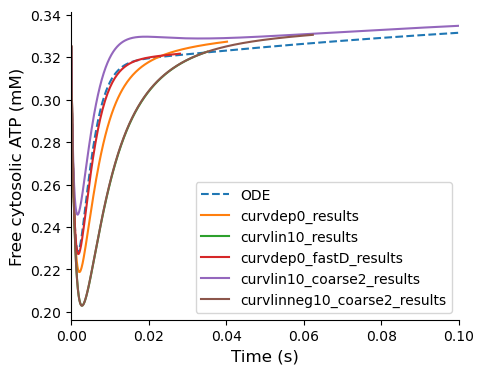

In [3]:
matrix_vol = 0.01646550900025656
om_area = 0.6320190057300417
ims_vol = 0.020313914966362288
im0_area = 0.5255854703788347
cristae_area = 1.0196892371671493
cyto_vol = 0.306
geoParam = [matrix_vol, ims_vol, cyto_vol]

var_names_all = ["ADP_matrix", "ATP_matrix", "ATP_cyto", "ATP_IMS", "L", "DL", "LD", 
                 "LT", "TL", "TLD", "DLD", "DLDp", "TLT", "TLTp", "E_IMS", "E_mat", 
                 "H3EStar_mat", "H3ES_mat", "H3E_mat", "ADP_IMS"]
# var_names_saved = ["DL", "DLD", "DLT", "ADP_IMS", "ADP_matrix", "E_IMS", "E_mat", "H3E_mat", "H3ES_mat",
#                    "H3EStar_mat", "L", "LD", "LT", "TL", "TLD", "ATP_IMS", "ATP_matrix", "ATP_cyto"]
var_names_saved = ["DLD", "DLT", "DL", "ADP_matrix", "E_IMS", "E_mat", "H3EStar_mat", "H3ES_mat",
                   "H3E_mat", "LD", "LT", "L", "TLD", "TL", "ATP_IMS", "ATP_matrix", "ATP_cyto"]
# curvdep_vec = [10]#[-60, -30, -15, 0, 15, 30, 60]
npyfiles = ["curvdep0_results.npy", "curvlin10_results.npy", "curvdep0_fastD_results.npy", "curvlin10_coarse2_results.npy", "curvlinneg10_coarse2_results.npy"]
Tcytofiles = ["T_cyto_curvdep0.txt", "T_cyto_curvlin10.txt", "T_cyto_fastD.txt", "T_cyto_curvlin10_coarse2.txt", "T_cyto_curvlinneg10_coarse2.txt"]
plot_names = ["ATP_cyto", "ATP_IMS", "ADP_matrix"]
conversions = [cyto_vol * 6.02e5, ims_vol * 6.02e5, matrix_vol * 6.02e5]
for k in [1]:#range(len(plot_names)):
    plot_name = plot_names[k]
    conversion = conversions[k]
    ode_idx = var_names_all.index(plot_name)
    results_idx = var_names_saved.index(plot_name) + 1 # add one because time is first el
    # first, ode solution
    # t_ode, ode_results = mito_ode_calc([0, 0.5], geoParam, 1.0)
    # plt.plot(t_ode, ode_results[:,ode_idx]/conversion, label=f"ODE", linestyle='dashed')
    # plt.plot(t_ode, ode_results[:,ode_idx]/im0_area, label=f"ODE", linestyle='dashed')
    t_ode, ode_results = mito_ode_calc([0, 0.1], geoParam, 10.0)
    plt.plot(t_ode, ode_results[:,ode_idx]/conversion, label=f"ODE", linestyle='dashed')
    # plt.plot(t_ode, ode_results[:,ode_idx]/im0_area, label=f"ODE", linestyle='dashed')
    for i in range(len(npyfiles)):
        if plot_name == "ATP_cyto":
            file_cur = f"{cur_dir}/T_cyto_files/{Tcytofiles[i]}"
            results_cur = np.loadtxt(file_cur)
            plt.plot(results_cur[:,0], results_cur[:,1],label=f"{npyfiles[i][0:-4]}")
        else:
            # file_cur = f"{cur_dir}/npy-files-new/results_curvdep{curvdep_vec[i]}_results.npy"
            file_cur = f"{cur_dir}/npy-files/{npyfiles[i]}"
            results_cur = np.load(file_cur)
            plt.plot(results_cur[0], results_cur[results_idx],label=f"{npyfiles[i][0:-4]}")
plt.legend()
plt.ylabel("Free cytosolic ATP (mM)")
plt.xlabel("Time (s)")
plt.xlim([0, 0.1])
# plt.ylim([.31, .325])
# plt.savefig("/root/shared/gitrepos/pyplots/cyto_ATP.pdf", format="pdf")